## Euclidean and Manhattan Distance Calculations

Visually compare the Euclidean distance to the Manhattan distance measures.

In [2]:
#Import Libraries 
import numpy as npy
import pandas as pda
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Load  Numerical Dataset
df = pda.read_csv('data/distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [4]:
# Compute Euclidean Distance. In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = npy.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

In [7]:
#Create a distance to reference point (3,3) matrix
dist_ref = npy.sqrt((df.Z-3)**2 + (df.Y-3)**2)


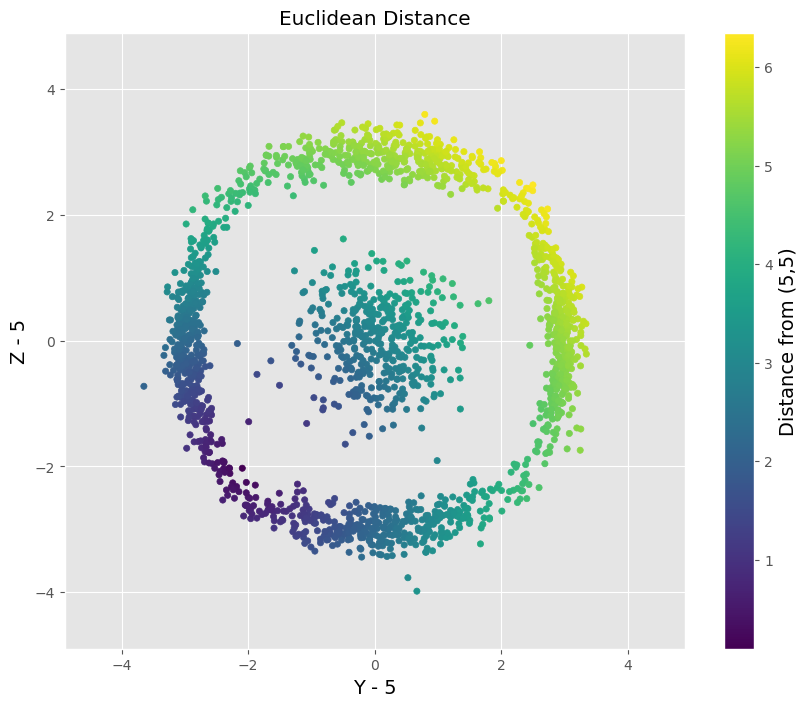

In [27]:
#Visualize Euclidean distance using the new distance matrix
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=dist_ref, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)



### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [14]:
# Compute Manhattan Distance. In the Y-Z plane, we compute the distance to ref point (5,5)
dist_manhattan = npy.abs(df.X - 5) + npy.abs(df.Z - 5)

In [21]:
#Create a distance to reference point (3,3) matrix for Manhattan Distance

dist_manhattan_t = npy.abs(df.X - 4) + npy.abs(df.Y-4)


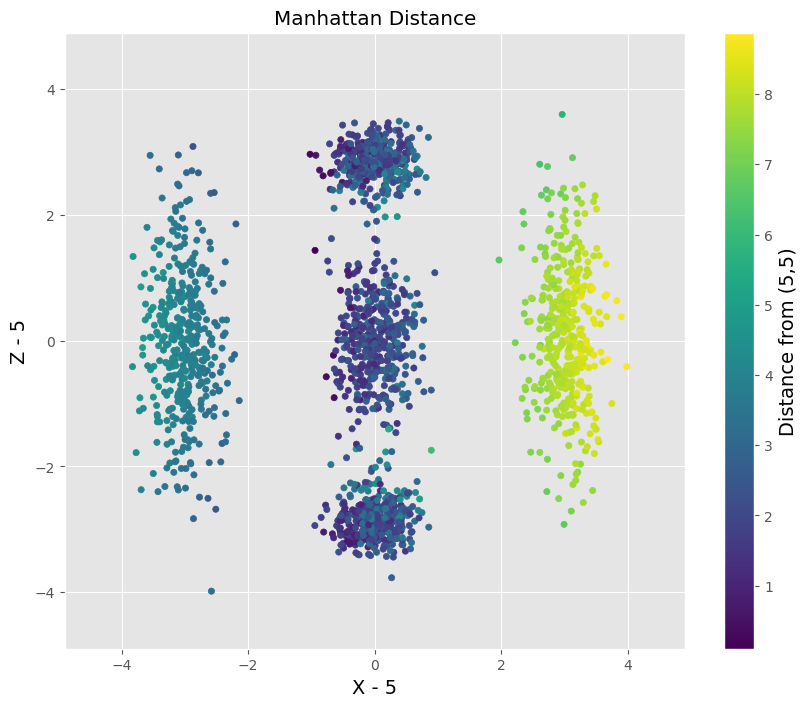

In [22]:
#Visualize Manhattan distance using the new distance matrix

figManhattan = plt.figure(figsize=[10,8])
plt.scatter(df.X - 5, df.Z-5, c=dist_manhattan_t, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('X - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Manhattan Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [28]:
#create distributions of these distance metrics and compare them leveraging the scipy dist function 
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = npy.random.random((10000,100))

In [24]:
#determine length
len(dist_manhattan)


2000

(array([5.86350e+04, 1.35710e+05, 1.12070e+05, 1.06917e+05, 1.30967e+05,
        1.25238e+05, 1.17943e+05, 1.83070e+05, 2.26198e+05, 1.99678e+05,
        1.63053e+05, 1.30373e+05, 9.10680e+04, 5.34550e+04, 5.51710e+04,
        5.66940e+04, 3.56420e+04, 1.41850e+04, 2.79600e+03, 1.37000e+02]),
 array([9.86792833e-03, 8.41012943e-01, 1.67215796e+00, 2.50330297e+00,
        3.33444799e+00, 4.16559300e+00, 4.99673801e+00, 5.82788303e+00,
        6.65902804e+00, 7.49017306e+00, 8.32131807e+00, 9.15246309e+00,
        9.98360810e+00, 1.08147531e+01, 1.16458981e+01, 1.24770431e+01,
        1.33081882e+01, 1.41393332e+01, 1.49704782e+01, 1.58016232e+01,
        1.66327682e+01]),
 <BarContainer object of 20 artists>)

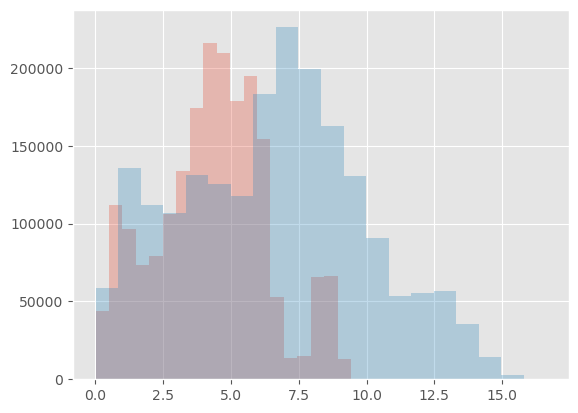

In [29]:
#Plot histograms of each distance matrix for comparison
plt.hist(DistEuclid, bins=20, alpha=0.3)
plt.hist(DistManhattan, bins=20, alpha=0.3)

(array([1.000000e+00, 1.000000e+00, 7.000000e+00, 5.400000e+01,
        2.330000e+02, 8.510000e+02, 2.833000e+03, 8.726000e+03,
        2.468900e+04, 6.198800e+04, 1.436330e+05, 3.024980e+05,
        5.828710e+05, 1.031141e+06, 1.674494e+06, 2.489740e+06,
        3.416357e+06, 4.318008e+06, 5.049453e+06, 5.460906e+06,
        5.460825e+06, 5.073397e+06, 4.369808e+06, 3.495649e+06,
        2.597231e+06, 1.799219e+06, 1.160862e+06, 6.988770e+05,
        3.904650e+05, 2.040870e+05, 9.965000e+04, 4.489300e+04,
        1.939400e+04, 7.796000e+03, 2.896000e+03, 1.030000e+03,
        3.120000e+02, 8.300000e+01, 2.800000e+01, 1.400000e+01]),
 array([20.19439126, 20.84797727, 21.50156328, 22.15514929, 22.8087353 ,
        23.46232131, 24.11590731, 24.76949332, 25.42307933, 26.07666534,
        26.73025135, 27.38383736, 28.03742337, 28.69100938, 29.34459539,
        29.9981814 , 30.65176741, 31.30535342, 31.95893943, 32.61252544,
        33.26611144, 33.91969745, 34.57328346, 35.22686947, 35.880

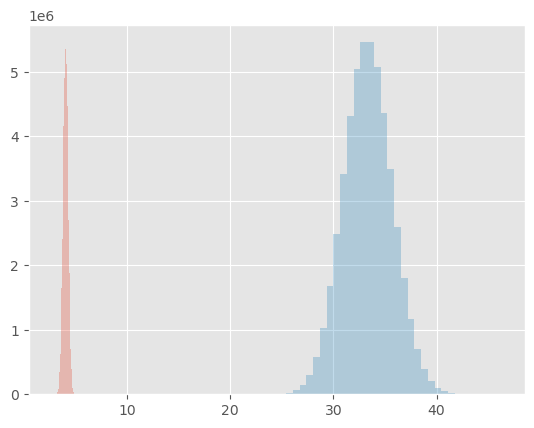

In [26]:
largeDistEuclid = dist.pdist(largeMat,'euclidean')
largeDistManhattan = dist.pdist(largeMat, 'cityblock')
plt.hist(largeDistEuclid, bins=40, alpha=0.3)
plt.hist(largeDistManhattan, bins=40, alpha=0.3)